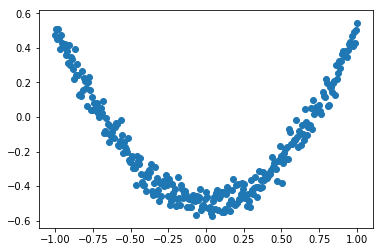

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 必须在命令行下执行，才可以看到函数不断逼近测试数据的动态图像，
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass			
        prediction_value=sess.run(prediction,feed_dict={xs:x_data})
        lines=ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.3)       
	   #print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
plt.pause(2)